In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
books = pd.read_csv('/Users/madhuridilipkumar/Desktop/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [33]:
ratings = pd.read_csv('/Users/madhuridilipkumar/Desktop/ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


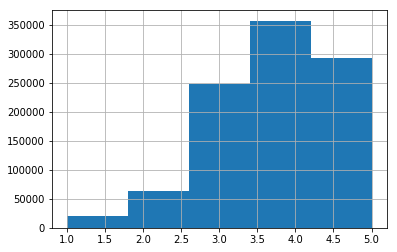

In [34]:
ratings.rating.hist( bins = 5 )

In [35]:
book_tags = pd.read_csv('/Users/madhuridilipkumar/Desktop/book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [36]:
tags = pd.read_csv('/Users/madhuridilipkumar/Desktop/tags.csv')
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [37]:
to_read = pd.read_csv('/Users/madhuridilipkumar/Desktop/to_read.csv')
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


# Merging datasets

In [38]:
#merging tags and book_tags with tag_id
tags_merge = pd.merge(tags,book_tags , on= 'tag_id')
tags_merge.head()

,tag_id,tag_name,goodreads_book_id,count
0,0,-,665,3
1,0,-,81176,5
2,0,-,147074,2
3,0,-,2983489,3
4,0,-,6713071,4


In [39]:
#merging books,rating with book_id
book_merge = pd.merge(books,ratings, on= 'book_id')
book_merge.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
0,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,314,3
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,588,1
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2077,2
3,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2487,3
4,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2900,3


In [40]:
#merging book_merge and tags_merge with best_book_id and goodreads_book_id

book_with_tags = pd.merge(book_merge, tags_merge, left_on='best_book_id', right_on='goodreads_book_id', how='inner')

In [41]:
book_with_tags_new = book_with_tags[['id','book_id','best_book_id','work_id','books_count','isbn','authors','original_publication_year','original_title','title','language_code','average_rating','ratings_count','work_ratings_count','work_text_reviews_count','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','user_id','rating','tag_id','tag_name','goodreads_book_id','count']].copy()

In [42]:
book_with_tags_new.head()

,id,book_id,best_book_id,work_id,books_count,isbn,authors,original_publication_year,original_title,title,...,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating,tag_id,tag_name,goodreads_book_id,count
0,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,101676,455024,1156318,3011543,314,3,1128,5-stars,3,1049
1,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,101676,455024,1156318,3011543,314,3,1691,adventure,3,2430
2,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,101676,455024,1156318,3011543,314,3,2104,all-time-favorites,3,1453
3,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,101676,455024,1156318,3011543,314,3,2106,all-time-favourites,3,385
4,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,101676,455024,1156318,3011543,314,3,3371,audio,3,627


# Data Cleaning

In [43]:
book_with_tags_new.isnull().sum()

id                                 0
book_id                            0
best_book_id                       0
work_id                            0
books_count                        0
isbn                           87900
authors                            0
original_publication_year      10000
original_title                168100
title                              0
language_code                1113900
average_rating                     0
ratings_count                      0
work_ratings_count                 0
work_text_reviews_count            0
ratings_1                          0
ratings_2                          0
ratings_3                          0
ratings_4                          0
ratings_5                          0
user_id                            0
rating                             0
tag_id                             0
tag_name                           0
goodreads_book_id                  0
count                              0
dtype: int64

In [44]:
book_with_tags_new.shape

(7825700, 26)

In [45]:
book_with_tags_new['original_title'].fillna(book_with_tags_new['original_title'].value_counts().index[0], inplace=True)
book_with_tags_new['language_code'].fillna(book_with_tags_new['language_code'].value_counts().index[0], inplace=True)
book_with_tags_new['isbn'].fillna(book_with_tags_new['isbn'].value_counts().index[0], inplace=True)
book_with_tags_new.original_publication_year = book_with_tags_new.original_publication_year.interpolate(method="linear")

In [46]:
book_with_tags_new.shape

(7825700, 26)

In [47]:
book_with_tags_new.original_publication_year.isnull().sum()

0

In [48]:
book_with_tags_new.dtypes

id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
user_id                        int64
rating                         int64
tag_id                         int64
tag_name                      object
goodreads_book_id              int64
count                          int64
dtype: object

In [49]:
#resetting the original_publication_year dtype as int
book_with_tags_new.original_publication_year =book_with_tags_new.original_publication_year.astype(np.int64)
book_with_tags_new.average_rating =book_with_tags_new.average_rating.astype(np.int64)

In [50]:
book_with_tags_new.dtypes

id                            int64
book_id                       int64
best_book_id                  int64
work_id                       int64
books_count                   int64
isbn                         object
authors                      object
original_publication_year     int64
original_title               object
title                        object
language_code                object
average_rating                int64
ratings_count                 int64
work_ratings_count            int64
work_text_reviews_count       int64
ratings_1                     int64
ratings_2                     int64
ratings_3                     int64
ratings_4                     int64
ratings_5                     int64
user_id                       int64
rating                        int64
tag_id                        int64
tag_name                     object
goodreads_book_id             int64
count                         int64
dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
book_with_tags_new["authors"] = lb_make.fit_transform(book_with_tags_new["authors"])
book_with_tags_new["original_title"] = lb_make.fit_transform(book_with_tags_new["original_title"])
book_with_tags_new["title"] = lb_make.fit_transform(book_with_tags_new["title"])
book_with_tags_new["language_code"] = lb_make.fit_transform(book_with_tags_new["language_code"])
book_with_tags_new["tag_name"] = lb_make.fit_transform(book_with_tags_new["tag_name"])
book_with_tags_new["isbn"] = lb_make.fit_transform(book_with_tags_new["isbn"])
#book_with_tags[["authors_code","original_title_code","title_code","language_code_code","tag_name_code"]].head(40)
book_with_tags_new.head(50)

,id,book_id,best_book_id,work_id,books_count,isbn,authors,original_publication_year,original_title,title,...,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating,tag_id,tag_name,goodreads_book_id,count
0,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,1128,220,3,1049
1,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,1691,305,3,2430
2,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,2104,381,3,1453
3,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,2106,382,3,385
4,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,3371,663,3,627
5,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,3389,667,3,1143
6,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,3392,668,3,1032
7,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,5090,972,3,761
8,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,5207,996,3,7917
9,2,3,3,4640799,491,457,197,1997,237,240,...,101676,455024,1156318,3011543,314,3,5444,1044,3,358


In [52]:
book_with_tags_new.dtypes

id                           int64
book_id                      int64
best_book_id                 int64
work_id                      int64
books_count                  int64
isbn                         int64
authors                      int64
original_publication_year    int64
original_title               int64
title                        int64
language_code                int64
average_rating               int64
ratings_count                int64
work_ratings_count           int64
work_text_reviews_count      int64
ratings_1                    int64
ratings_2                    int64
ratings_3                    int64
ratings_4                    int64
ratings_5                    int64
user_id                      int64
rating                       int64
tag_id                       int64
tag_name                     int64
goodreads_book_id            int64
count                        int64
dtype: object

In [53]:
book_with_tags_new.shape

(7825700, 26)

# Linear regression

In [57]:
from sklearn import preprocessing
from sklearn import utils

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDRegressor

In [58]:
preprocess = make_column_transformer(
    (['id','book_id','best_book_id','work_id','books_count','isbn','authors','original_publication_year','original_title','title','language_code','average_rating','ratings_count','work_ratings_count','work_text_reviews_count','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','user_id','rating','tag_id','tag_name','goodreads_book_id','count'], StandardScaler()))

/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:739: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [59]:
preprocess.fit_transform(book_with_tags_new)

/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.15735255, -1.75830507, -1.75830507, ..., -1.53851162,
        -1.75830507,  0.12010986],
       [-1.15735255, -1.75830507, -1.75830507, ..., -1.49426631,
        -1.75830507,  0.35532867],
       [-1.15735255, -1.75830507, -1.75830507, ..., -1.45470581,
        -1.75830507,  0.18892116],
       ...,
       [ 2.28245463,  1.42483802,  1.42483802, ...,  1.7585443 ,
         1.42483802, -0.0486822 ],
       [ 2.28245463,  1.42483802,  1.42483802, ...,  1.7601059 ,
         1.42483802, -0.04220985],
       [ 2.28245463,  1.42483802,  1.42483802, ...,  1.76062644,
         1.42483802, -0.05805007]])

In [61]:
target = book_with_tags_new['best_book_id']

In [62]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(book_with_tags_new, target, random_state=0)

In [63]:
preprocess_linear = make_column_transformer(
    (make_pipeline(Imputer(), StandardScaler()),book_with_tags_new))

/Users/madhuridilipkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
model_linear = make_pipeline(
    preprocess_linear,
    SGDRegressor()
)

In [65]:
model_linear.fit(X_train_df, y_train_df)
print("Linear score: %f" % model_linear.score(X_test_df, y_test_df))

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed